# 10-test-stl.ipynb

This notebook performs the segmentation workflow adapted for the compressed F50 sand experiment and adds a step to convert the segmented voxels to tri-meshes to be saved as STLs.

# Import packages

In [1]:
# Set to False to use matplotlib.pyplot to view 2D images one at a time
use_napari = True
# Standard library imports
import math
from pathlib import Path
import sys
# Third-party imports
import matplotlib.pyplot as plt
if use_napari:
    import napari
import numpy as np
from skimage import color, exposure, filters, measure
# Local module imports
module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)
import segment
# Enable autoreload packages for changes made to local modules
%load_ext autoreload
%autoreload 2

# Load 3D data

Passing `slice_crop`, `row_crop`, and `col_crop` to only load part of the dataset

In [19]:
# Load images as 3D array from a directory containing images
imgs = segment.load_images(
    r'C:\Users\gusb\Research\PSAAP\PetaLibrary\F63tiff',
    slice_crop=[400, 550], 
    row_crop=[400, 550], 
    col_crop=[400, 550],
    return_3d_array=True,
    convert_to_float=True,
    file_suffix='tiff'
)
print(f'Images loaded as 3D array: {imgs.shape}')

Images loaded as 3D array: (150, 150, 150)


In [20]:
# Show images with napari
if use_napari:
    # Open napari viewer
    viewer = napari.Viewer()
    viewer.add_image(imgs)

# Binarize data

In [38]:
imgs_binarized, thresh_vals = segment.binarize_multiotsu(
    imgs, n_otsu_classes=3, n_selected_thresholds=1
)

# Segment Data

In [39]:
segment_dict = segment.watershed_segment(
    imgs_binarized, 
    min_peak_distance=7, 
    return_dict=True
)

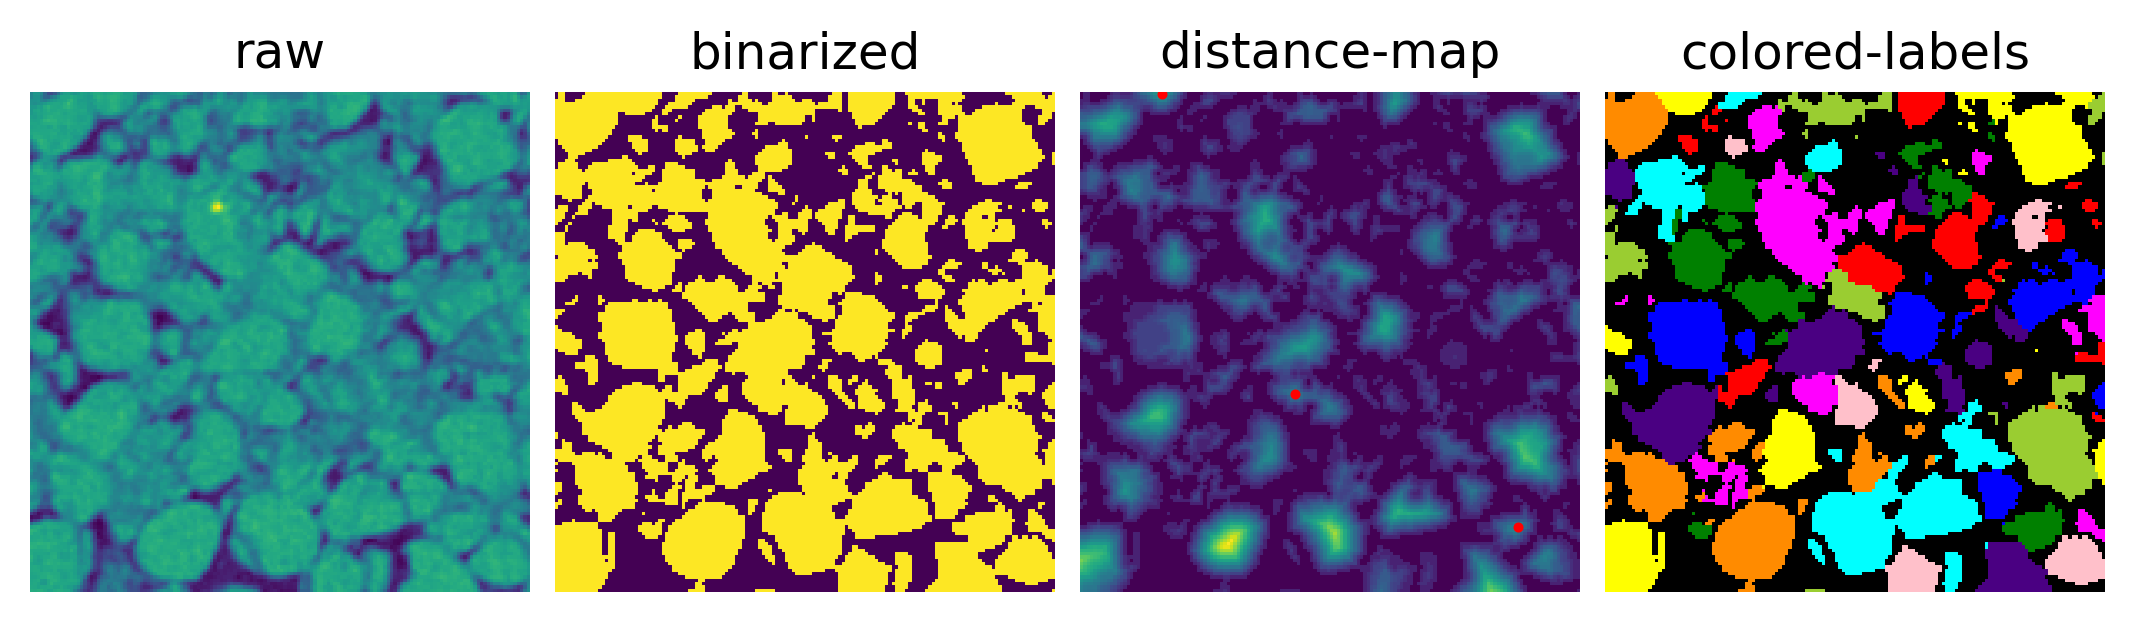

In [40]:
fig, axes = segment.plot_segment_steps(imgs, segment_dict, 55)
plt.show()